In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['tweet_emotions.csv']))

Saving tweet_emotions.csv to tweet_emotions.csv


In [ ]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


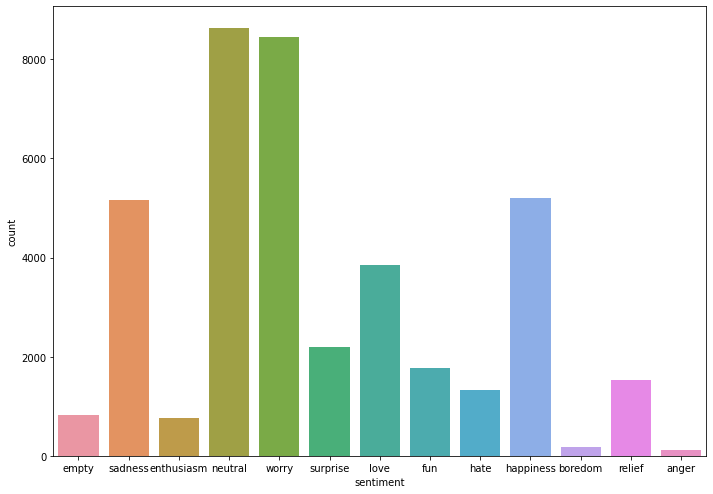

In [ ]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sb.countplot(df['sentiment'])

In [ ]:
from nltk.corpus import stopwords
import re
import string 
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
def remove_punct(text):
    text = re.sub(r'[^\w\s]', ' ', text)
    return text
def remove_nums(txt):
    lenth = len(txt)
    ans = ''; word = ''
    for i in range(0,lenth):
        if (txt[i].isalpha() ==  True):
            word = word + txt[i]
        else:
            if (txt[i].isspace() == True):
                ans = ans + word + ' '
                word = ''
            elif (txt[i].isdigit == True):
                continue
    ans = ans + word
    return ans
def to_lower_case(text):
    return text.lower()
def remove_abbrevs(text):
    abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
    }
    lst = []
    for word in text.split():
        if word in abbreviations.keys():
            lst.append(abbreviations[word])
        else:
            lst.append(word)
    return ' '.join(lst)
def remove_all(x):
    newtext = re.sub( '[^a-zA-Z0-9]', ' ', x)
    return newtext
def remove_handle(text):
    text = re.sub('@[^\s]+','',text)
    return text 
def lemmatize(text):
    import nltk
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lst = [lemmatizer.lemmatize(word) for word in text.split(' ')] 
    text = ' '. join(lst)
    return text 
def stemming(text):
    from nltk.stem import PorterStemmer
    ps = PorterStemmer()
    lst = [ps.stem(word) for word in text.split(' ')] 
    text = ' '. join(lst)
    return text 

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
def preprocess_text(text):
    text = remove_handle(text)
    #text = remove_all(text)
    text = remove_url(text)
    text = remove_html(text)
    text = remove_punct(text)
    text = remove_nums(text)
    text = remove_abbrevs(text)
    text = text.lower()
    text = lemmatize(text)
    #text = stemming(text)
    return text

In [ ]:
df['cleaned_text'] = df['content'].apply(preprocess_text)
l = list((df[(df['cleaned_text'] == '')]).index)
for i in l:
    df.drop(i, inplace = True) 
  
df

,tweet_id,sentiment,content,cleaned_text
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,i know i wa listenin to bad habit earlier and ...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh waitin on y...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,want to hang out with friend soon
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,we want to trade with someone who ha houston t...
...,...,...,...,...
39994,1753918900,happiness,Succesfully following Tayla!!,succesfully following tayla
39996,1753919001,love,Happy Mothers Day All my love,happy mother day all my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,happy mother s day to all the mommy out there ...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,wassup beautiful follow me peep out my new hit...


In [ ]:
df['cleaned_text'].isnull().sum()

0

In [ ]:
x = df['cleaned_text']
x = x.reset_index()
x.drop('index', axis=1, inplace = True)
x

,cleaned_text
0,i know i wa listenin to bad habit earlier and ...
1,layin n bed with a headache ughhhh waitin on y...
2,funeral ceremony gloomy friday
3,want to hang out with friend soon
4,we want to trade with someone who ha houston t...
...,...
39896,succesfully following tayla
39897,happy mother day all my love
39898,happy mother s day to all the mommy out there ...
39899,wassup beautiful follow me peep out my new hit...


In [ ]:
dic = {'empty':0, 'sadness':1, 'enthusiasm':2, 'neutral':3, 'worry':4, 'surprise':5, 'love':6, 'fun':7, 'hate':8, 'happiness':9, 
            'boredom':10, 'relief':11, 'anger':12}
def enc(x):
    return dic[x]

y = df['sentiment'].apply(enc)
y = y.reset_index()
y.drop('index', axis=1, inplace = True)
y['sentiment'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
39896    False
39897    False
39898    False
39899    False
39900    False
Name: sentiment, Length: 39901, dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) 

In [ ]:
d_train = pd.merge(x_train, y_train, left_index=True, right_index=True) 
d_train = d_train.reset_index()
#d_train = d_train.drop(['index', 'index_x', 'index_y'], inplace = True, axis=1)
d_train.drop(['index'], inplace = True, axis=1)
d_train 

,cleaned_text,sentiment
0,thank you you kno people already look my chest...,3
1,oh i is dubbed breesaholic insomniac feel spec...,5
2,yeah i had a suspicion about that i think i m ...,4
3,come on give her nice home,3
4,it s raining here i m stuck inside working tod...,1
...,...,...
29920,rip michael,1
29921,need to take my laptop to see a specialist it ...,4
29922,at the avenue raining so cool,9
29923,i wish i wa going to we love sound,6


In [ ]:
d_train
def lenn(x):
    return len(x) 
d_train['ll'] = d_train['cleaned_text'].apply(lenn)
d_train['ll'].max()

161

In [ ]:
texts = np.array(x)
#texts.reshape((39901,1))
texts = texts.ravel()
texts.shape

(39901,)

In [ ]:
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences

In [ ]:
#embedding textual data
tokenizer = Tokenizer(num_words = 80000)
tokenizer.fit_on_texts(texts)
seq = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
text = pad_sequences(seq, maxlen = 161)
text


array([[    0,     0,     0, ...,    27,   187,   480],
       [    0,     0,     0, ...,    16,    46,   258],
       [    0,     0,     0, ...,  3743,  1651,   225],
       ...,
       [    0,     0,     0, ...,     9,    46,    20],
       [    0,     0,     0, ...,    10,     3,   368],
       [    0,     0,     0, ..., 26683, 26684, 26685]], dtype=int32)

In [ ]:
#glove embeddings:
!wget https://nlp.stanford.edu/data/glove.twitter.27B.zip

--2022-12-29 18:06:07--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2022-12-29 18:06:07--  https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [application/zip]
Saving to: ‘glove.twitter.27B.zip’

glove.twitter.27B.z 100%[===================>]   1.42G  5.02MB/s    in 4m 44s  

2022-12-29 18:10:52 (5.10 MB/s) - ‘glove.twitter.27B.zip’ saved [1520408563/1520408563]



In [ ]:
!unzip glove.twitter*.zip


Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  
  inflating: glove.twitter.27B.100d.txt  
  inflating: glove.twitter.27B.200d.txt  


In [ ]:
f = open('glove.twitter.27B.25d.txt', encoding = 'utf-8')

In [ ]:
embeddings_index = {}
for line in f:
    try:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    except UnicodeDecodeError:
        pass
f.close()

In [ ]:
embedding_matrix = np.random.random((len(word_index) + 1, 25))
for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) != len(embedding_vector):
                exit(1)
            embedding_matrix[i] = embedding_vector
embedding_matrix.shape

(26686, 25)

In [ ]:
from keras.layers import Dropout, Dense, GRU, Embedding, LSTM, Bidirectional, TimeDistributed, Flatten
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
model_1 = Sequential()

model_1.add(Embedding(input_dim = len(word_index)+1, output_dim = 25, weights = [embedding_matrix], input_length = 161, trainable = True)) 

In [ ]:
model_1.add(LSTM(32))

In [ ]:
model_1.add(Dense(13, activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 161, 25)           667150    
                                                                 
 lstm (LSTM)                 (None, 32)                7424      
                                                                 
 dense (Dense)               (None, 13)                429       
                                                                 
Total params: 675,003
Trainable params: 675,003
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy']) 

In [ ]:
#input: x part is text, y part is y

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text, y, test_size=0.20, random_state=42) 

In [ ]:
history_1 = model_1.fit(x_train,y_train,epochs = 10, validation_split = 0.20)

Epoch 1/10
798/798 [==============================] - 33s 39ms/step - loss: 2.0664 - accuracy: 0.2856 - val_loss: 1.9751 - val_accuracy: 0.3156
Epoch 2/10
798/798 [==============================] - 30s 38ms/step - loss: 1.9115 - accuracy: 0.3442 - val_loss: 1.9101 - val_accuracy: 0.3393
Epoch 3/10
798/798 [==============================] - 31s 38ms/step - loss: 1.8252 - accuracy: 0.3766 - val_loss: 1.8921 - val_accuracy: 0.3524
Epoch 4/10
798/798 [==============================] - 31s 38ms/step - loss: 1.7518 - accuracy: 0.4035 - val_loss: 1.8756 - val_accuracy: 0.3548
Epoch 5/10
798/798 [==============================] - 32s 40ms/step - loss: 1.6713 - accuracy: 0.4339 - val_loss: 1.9226 - val_accuracy: 0.3551
Epoch 6/10
798/798 [==============================] - 31s 38ms/step - loss: 1.5824 - accuracy: 0.4656 - val_loss: 1.9474 - val_accuracy: 0.3446
Epoch 7/10
798/798 [==============================] - 31s 39ms/step - loss: 1.4825 - accuracy: 0.5055 - val_loss: 2.0416 - val_accuracy:

In [ ]:
predict1 = model_1.predict(x_test)

250/250 [==============================] - 3s 11ms/step


In [ ]:
pred_labels = np.argmax(predict1,axis=1)
print(metrics.classification_report(y_test, pred_labels))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       177
           1       0.30      0.23      0.26      1018
           2       0.00      0.00      0.00       151
           3       0.34      0.44      0.38      1690
           4       0.34      0.38      0.36      1671
           5       0.13      0.08      0.10       474
           6       0.38      0.45      0.41       790
           7       0.09      0.04      0.05       335
           8       0.23      0.29      0.26       260
           9       0.30      0.38      0.33      1028
          10       0.00      0.00      0.00        34
          11       0.09      0.03      0.05       338
          12       0.00      0.00      0.00        15

    accuracy                           0.31      7981
   macro avg       0.17      0.18      0.17      7981
weighted avg       0.28      0.31      0.29      7981



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = len(word_index)+1, output_dim = 25, weights = [embedding_matrix], input_length = 161, trainable = True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(13, activation = 'softmax')
])

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 161, 25)           667150    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              46080     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 13)                1677      
                                                                 
Total params: 714,907
Trainable params: 714,907
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(x_train,y_train,epochs = 10, validation_split = 0.20)

Epoch 1/10
798/798 [==============================] - 75s 89ms/step - loss: 2.0170 - accuracy: 0.3009 - val_loss: 1.9392 - val_accuracy: 0.3357
Epoch 2/10
798/798 [==============================] - 84s 105ms/step - loss: 1.8864 - accuracy: 0.3532 - val_loss: 1.8878 - val_accuracy: 0.3567
Epoch 3/10
798/798 [==============================] - 78s 97ms/step - loss: 1.8061 - accuracy: 0.3799 - val_loss: 1.8652 - val_accuracy: 0.3647
Epoch 4/10
798/798 [==============================] - 80s 100ms/step - loss: 1.7326 - accuracy: 0.4075 - val_loss: 1.8803 - val_accuracy: 0.3595
Epoch 5/10
798/798 [==============================] - 78s 98ms/step - loss: 1.6530 - accuracy: 0.4386 - val_loss: 1.8970 - val_accuracy: 0.3582
Epoch 6/10
798/798 [==============================] - 80s 100ms/step - loss: 1.5606 - accuracy: 0.4719 - val_loss: 1.9683 - val_accuracy: 0.3465
Epoch 7/10
798/798 [==============================] - 79s 98ms/step - loss: 1.4573 - accuracy: 0.5085 - val_loss: 2.0396 - val_accura

In [ ]:
predict2 = model_2.predict(x_test)

250/250 [==============================] - 8s 26ms/step


In [ ]:
pred_labels_2 = np.argmax(predict2,axis=1)
print(metrics.classification_report(y_test, pred_labels_2))

              precision    recall  f1-score   support

           0       0.08      0.01      0.02       177
           1       0.30      0.23      0.26      1018
           2       0.00      0.00      0.00       151
           3       0.34      0.52      0.41      1690
           4       0.34      0.33      0.33      1671
           5       0.10      0.05      0.07       474
           6       0.43      0.41      0.42       790
           7       0.13      0.04      0.07       335
           8       0.24      0.22      0.23       260
           9       0.31      0.42      0.36      1028
          10       0.00      0.00      0.00        34
          11       0.12      0.07      0.09       338
          12       0.00      0.00      0.00        15

    accuracy                           0.32      7981
   macro avg       0.18      0.18      0.17      7981
weighted avg       0.29      0.32      0.30      7981



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
